<a href="https://colab.research.google.com/github/annazxc/updated-uni-projects/blob/main/GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The principles of Generative Adversarial Network (GAN)
#生成對抗網路基本原理(主題二）

#An image by Chatgpt with prompt:
>Please generate an image of two ancient Roman men fighting against each other in gothic style, the picture should be detailed and intricate. one wearing a jersey with big logo "Generator", the other holding a classical shield with big logo "Discriminator" on it and the blue sky behind them： red smoke quoting "A ZERO SUM GAME" The discriminator tries to correctly classifying real and fake data.The generator tries to fooling the discriminator.

<center>
  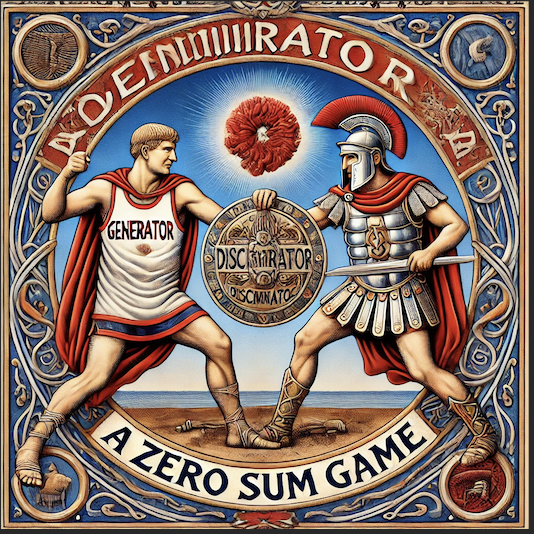
</center>


<h2>GAN Objective Function</h2>

從 **"Adversarial"（對抗）** 一詞可以看出，GAN 的核心理念是由一個 **生成器 (Generator, G)** 和一個 **判別器 (Discriminator, D)** 互相對抗，進行**零和遊戲**。  

- **Generator** 試圖利用隨機輸入生成假樣本 (fake samples)，以欺騙 **Discriminator**。  
- **Discriminator** 則試圖準確區分輸入數據是真實還是偽造的。  

這個對抗過程可用以下數學式子來表示：   

$$
\min_G \max_D V(D, G)
$$

<p>where:</p>

$$
V(D, G) = \mathbb{E}_{x \sim p_{\text{data}}(x)} [\log D(x)] + \mathbb{E}_{z \sim p_z(z)} [\log (1 - D(G(z)))]
$$  

---

以下解釋式子含義


## GAN 的運作原理  

假設從真實數據集隨機選取一個樣本 X，將其輸入 **判別器 (Discriminator, D)**，輸出一個機率值 D(x) 。這個機率代表 \( D \) 判斷該數據是真實數據的信心程度。  

- 若 \( D(x) = 1 \)，表示 \( D \) 完全確信該數據為真實的，這與 \( x \) 來自真實數據集的事實相符，因此 \( D \) 的判斷是正確的。此時，對數損失函數為：
  
  $$
  \log D(x) = \log(1) = 0
  $$

- 相比之下，若 \( 0 < D(x) < 1 \)，則 log D(x)  會產生負的值。因此，當 (D) 的判斷越準確時，**目標函數  V(D, G) 會增大**，所以 **\( D \) 的目標是最大化 V(D, G)**。  

另一方面，當從隨機 noise 分佈中取一個樣本 z 並輸入 **生成器 (Generator, G)**，產生一個 **假樣本 (fake sample)**  G(z) ，再將其交由 ( D ) 判斷。  

- ( G ) 希望最小化 V(D, G) ，也就是讓  D(G(z))  趨近於 1，使得 ( D ) 誤以為生成的假樣本是真實數據。  
- 若 \( G \) 成功騙過 \( D \)，表示它產生的假數據與真實數據極為相似，達到了生成器的目標。  

## 判別器 (Discriminator, D) 的目標  

判別器 ( D ) 希望**最大化**目標函數 ( V(D, G) )，也就是：  

- **對於真實數據** ，\( D \) 期望 \( D(x) = 1 \)，這樣能讓：
  
  $$
  \log D(x) = \log(1) = 0
  $$

- **對於生成數據**，( D ) 期望 ( D(G(z)) = 0 ，這樣能讓：
  
  $$
  \log(1 - D(G(z))) = \log(1 - 0) = 0
  $$

當 D 成功區分真實與假數據時，**目標函數 ( V(D, G) ) 可達最大值 (Vmax)**。


因此 GAN 的訓練是一個 **零和博弈**，其中 **\( D \) 試圖準確區分真實與假數據，  
而 \( G \) 則試圖生成足夠逼真的假數據來欺騙 \( D \)**

#The workflow of GAN by [GAN lab](https://poloclub.github.io/ganlab/).


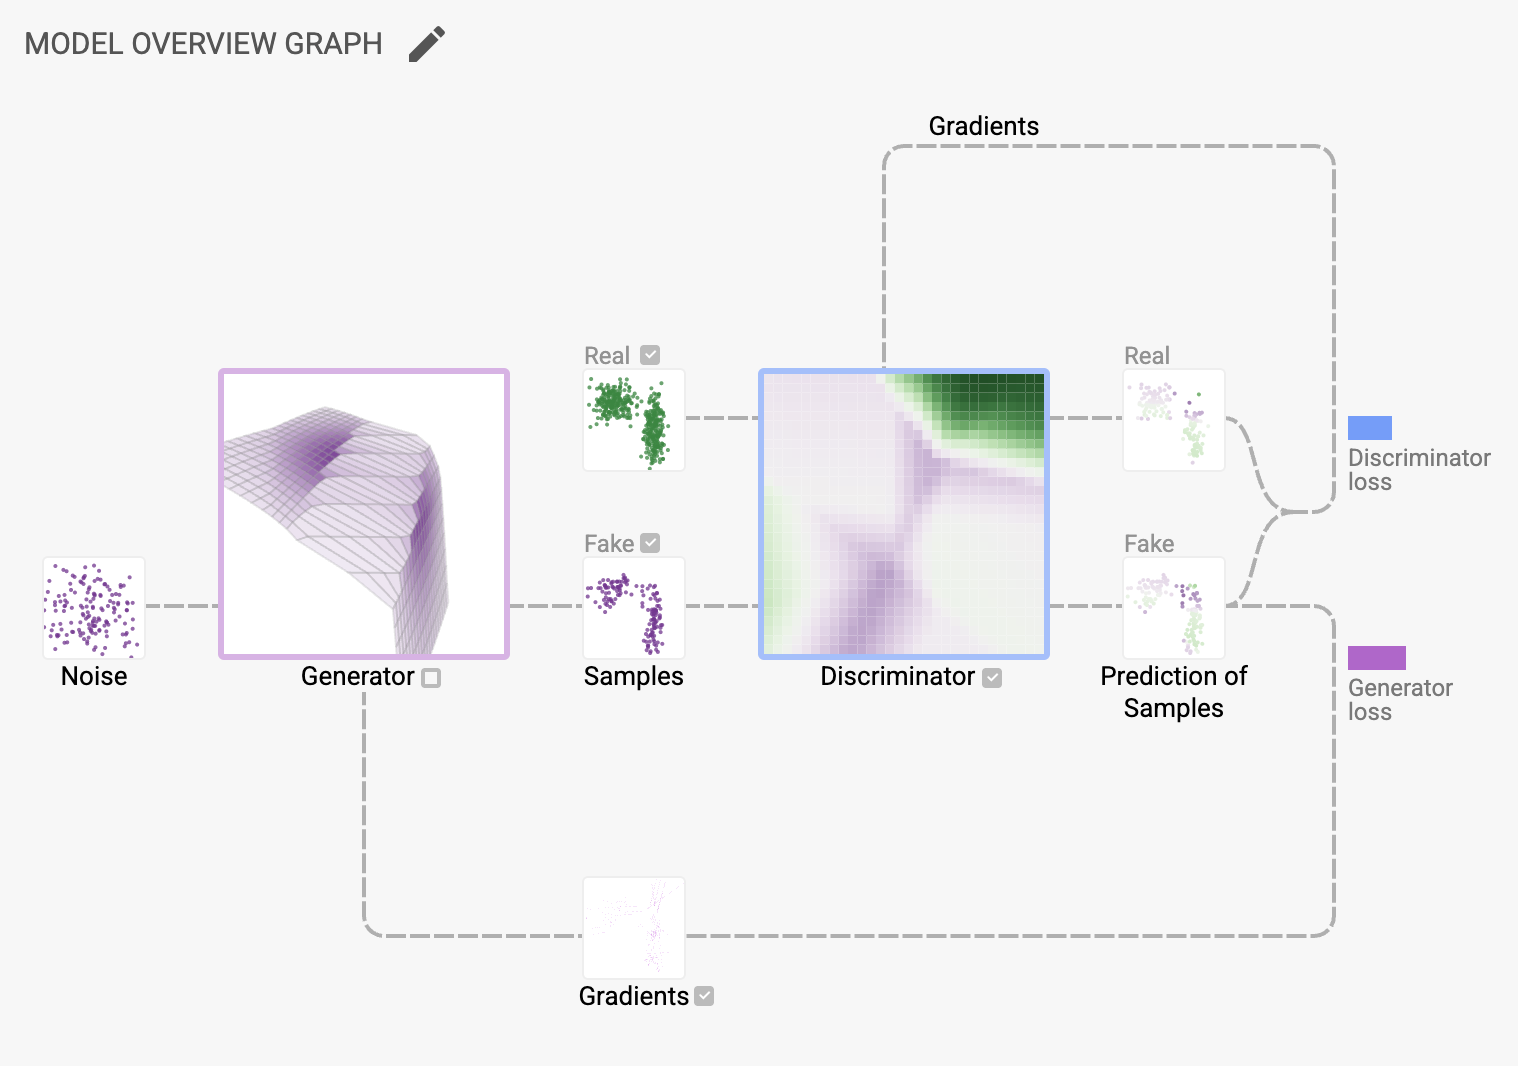

# 一些名詞解釋
### 1. **Entropy（熵）**

越不常發生的事件帶來的資訊量越大。比如，“明天新竹風大”是非常常見的事件，不需要太多資訊來描述，而“明天新竹絲毫沒有風”則是一個罕見的事件，帶來更多的資訊。

**Entropy** 就是用來衡量你對明天天氣的預測有多困難。如果完全隨機，**Entropy** 就會很高，因為完全無法預測。如果每天天氣都是一樣的，那麼 **Entropy**（亂度）就會很低，因為你知道一定會有怎樣的天氣。

### 2. **Cross Entropy**
在分類問題中，常用來衡量模型預測結果與真實結果之間的差異。  
它特別適用於具有多個可能結果的分類問題

### 為什麼常用於分類問題？

假設我們訓練了兩個模型，用來辨識大象的圖片，而輸入的訓練圖片有大象、老鼠和貓三種可能。假設我們有以下的情況：

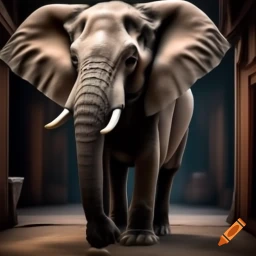

### Elephant in the room by [Craiyon](https://www.craiyon.com/)

- **A 模型** 會給出一張大象圖片的機率分佈為：(0.6, 0.2, 0.2)，  
即大象 60%、老鼠 20%、貓 20%。
- **B 模型** 會給出一張大象圖片的機率分佈為：(0.6, 0.3, 0.1)，  
即大象 60%、老鼠 30%、貓 10%。

而大象圖片的**真實機率分佈**是：(1, 0, 0)，即大象 100%、老鼠 0%、貓 0%。

這兩個模型的預測準確度表面上看來相同，都是大象的預測機率為 60%，所以它們的準確率都是 60%。然而，若我們使用**最小平方法**來計算損失函數（即均方誤差），則兩者的損失計算會是不同的：

- **A 模型的損失**：

  0.4^2 + 0.2^2 + 0.2^2 = 0.16 + 0.04 + 0.04 = 0.24

- **B 模型的損失**：
  
  0.4^2 + 0.3^2 + 0.1^2 = 0.16 + 0.09 + 0.01 = 0.26
  

即使這兩個模型的預測準確率相同，但它們的損失不同，這讓我們無法正確地判斷哪個模型更好。這是因為均方誤差關注的是預測值與真實值的差距，但它並沒有充分考慮預測的機率分佈與真實分佈之間的匹配程度。

### 如何解決這個問題呢？

這時候，**Cross Entropy** 可以提供一個更合理的衡量方式：

$$
H(p, q) = - E_{x \sim p} [ \log q(x) ]
$$

這個公式描述的是，對於每個可能的類別 (x)，我們計算模型預測資訊量$-log(q(x))$ 然後乘以真實機率分佈 p(x) 中對應類別的機率，最後取期望值(平均資訊量）。  

在上述的例子中，因為真實情況是 (1, 0, 0) ，所以：

- **A 模型的 Cross Entropy**：
  $$
  -1 \times \log(0.6) = -log(0.6)
  $$
- **B 模型的 Cross Entropy**：
  $$
  -1 \times \log(0.6) = -log(0.6)
  $$

無論是 A 模型還是 B 模型，最終它們的 **Cross Entropy** 計算結果相同，這樣就能合理地反映出兩個模型在給定真實情況下的預測表現，而不會因為均方誤差造成的細微差距而誤判模型的好壞。

###還有什麼情境常用Cross entropy?

在 **NLP（自然語言處理）** 中，像是 ChatGPT 這類語言模型，會透過 **"文字接龍"** 的方式來預測下一個詞的機率分布。當訓練模型時，每個單詞通常會被表示為 **one-hot encoding 向量**，而模型則輸出一個 **機率分布**（透過 Softmax 轉換獲得）。這正適合使用 **Cross Entropy**

然而，在實際生成文字時，模型並**不會**每次都選擇機率最高的單詞，而是根據機率分布進行**隨機抽樣**，以提高回應的多樣性。我們還可以調整**溫度參數（Temperature）** 來控制隨機性：
- **較低的溫度（如 0.1）**：模型會更傾向選擇機率最高的詞，使得回應較為固定
- **較高的溫度（如 1.5）**：模型的選擇會更具隨機性，提升創意但也可能降低合理性

這利用了**指數函數贏者全拿（Exponentiation favors the winner）**」的特性。
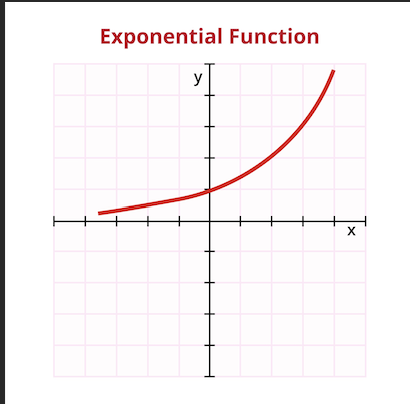

由 $ e^x $ 的圖形可以觀察到，當 $ x \approx 0 $ 時，$ e^x $ 的變化趨勢接近線性taylor expansion $e^x \approx 1+x$ 即 x 的小變動僅會導致 $e^x $略微變化。  
然而，當 $x > 0$且 x 距離 0 越遠，相同的微小變化 $ dx $ 會導致 $e^x $ 的變化幅度指數顯著增加。  


### 3. **KL Divergence（KL 散度）（相對熵）**

回顧交叉熵的公式：
$$
H(p, q) = - E_{x \sim p} [ \log q(x) ]
$$
展開後可寫為：
$$
H(p, q) = -\sum p_i \log q_i
$$

當 $p = q$ 時，交叉熵達到最小值，這時：
$$
H(p, p) = -\sum p_i \log p_i = H(p)
$$
其中，$H(p)$ 是 $p$ 本身的熵（Entropy），表示在分布 $p$ 下的最小資訊量。

但我們希望有一個衡量「兩個機率分布差異」的指標，因此我們定義 **KL 散度**（Kullback-Leibler Divergence）為：
$$
D_{KL}(p \| q) = H(p, q) - H(p)
$$
即：
$$
D_{KL}(p \| q) = \sum p_i \log \frac{p_i}{q_i}
$$
它**不對稱**，即 $D_{KL}(p \| q) \neq D_{KL}(q \| p)$。  
左式是指以p(x)為基準考慮 q 和 p 相差多少,
這表示：當我們使用 $q(x)$ 來近似 $p(x)$ 時，額外的資訊量損失是多少。  
就是說當q(x)補齊了差的資訊量，
則他們的分布就能相同了,右式的基準則為q(x)    
當且僅當 $p = q$ 時，$D_{KL}(p \| q) = 0$




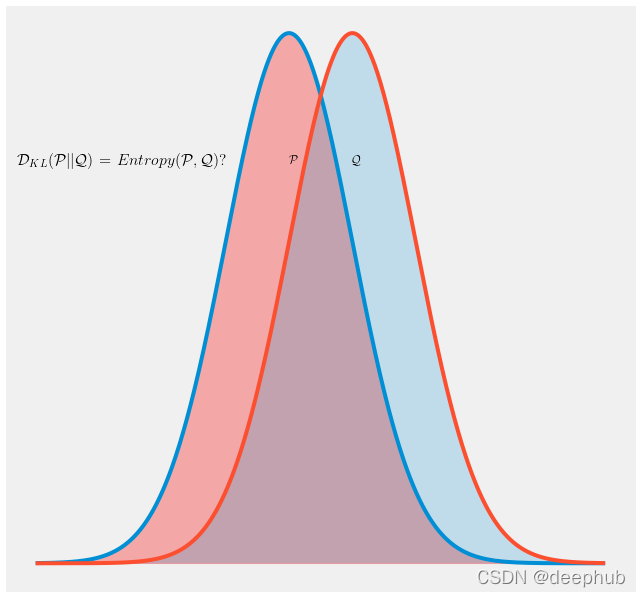

### 4. KL 散度與貨幣匯率的類比
我們可以將Kl divergence的某些概念類比為貨幣概念幫助理解.  
不對稱性：類似於在實際匯率交易中，買入匯率和賣出匯率通常是不同的。

$D_{KL}(p \| q)$ 衡量的是當我們用分布 q 來近似真實分布 p 時所產生的資訊損失。  
可以比喻成貨幣兌換中的手續費或價值損失。

在貨幣匯率中，我們是將一種貨幣的實際價值轉換成另一種貨幣。而在 KL 散度中，我們是測量兩個機率分布之間的差異，就是測量用一個機率分布來描述另一個機率分布時所需的額外資訊量。
因為-log(機率)就代表資訊量

可以做以下類比：
- 分布 p 代表「理想匯率」（無手續費的直接兌換）
- 分布 q 代表「實際匯率」（包含各種損失）
- KL(p||q) 則衡量這兩種匯率之間的差距，代表實際兌換所產生的總損失

## Side Notes : Cross entropy 和 Kl divergence

**數學關係**：
   - Cross Entropy = Entropy + KL Divergence
   - $ H(P,Q) = H(P) + D_KL(P||Q)$，其中H(P)是分布P的熵